In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import git
import pandas as pd
import matplotlib.pyplot as plt
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir
datadir = f"{homedir}/data/"
df_cases = pd.read_csv(datadir + 'us/covid/confirmed_cases.csv')
df_deaths = pd.read_csv(datadir + 'us/covid/deaths.csv')

In [3]:
from scipy.special import erf
from scipy.optimize import least_squares

In [18]:
import numpy as np

# Erf regression

In [4]:
def model(t, params):
    return params[0] * (1+erf(params[1]*(t-params[2])))

In [5]:
def residual(params, window):
    return model(t_vec[:-window], params)-data[t_vec[:-window]]

In [6]:
df_deaths.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,3,3,3,3,3,3,4,4,4,4
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,4,4,4,5,5,5,5,5,5,6
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


In [7]:
df_deaths = df_deaths.set_index('countyFIPS')

In [8]:
df_deaths.head()

,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
countyFIPS,,,,,,,,,,,,,,,,,,,,,
0,Statewide Unallocated,AL,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,Autauga County,AL,1,0,0,0,0,0,0,0,...,3,3,3,3,3,3,4,4,4,4
1003,Baldwin County,AL,1,0,0,0,0,0,0,0,...,4,4,4,5,5,5,5,5,5,6
1005,Barbour County,AL,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1007,Bibb County,AL,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


In [9]:
df_deaths.sort_values(by='5/3/20',ascending=False).head(20)

,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
countyFIPS,,,,,,,,,,,,,,,,,,,,,
36047,Kings County,NY,36,0,0,0,0,0,0,0,...,5542,5632,5678,5745,5753,5850,5902,5975,6003,6024
36081,Queens County,NY,36,0,0,0,0,0,0,0,...,5279,5385,5433,5460,5609,5671,5717,5777,5791,5820
36005,Bronx County,NY,36,0,0,0,0,0,0,0,...,3538,3607,3642,3671,3711,3747,3784,3837,3847,3867
36061,New York County,NY,36,0,0,0,0,0,0,0,...,2174,2205,2220,2260,2368,2399,2412,2449,2455,2471
26163,Wayne County,MI,26,0,0,0,0,0,0,0,...,1884,1893,1924,1945,1973,2012,2028,2082,2097,2105
17031,Cook County,IL,17,0,0,0,0,0,0,0,...,1743,1786,1802,1922,2004,2110,2197,2264,2317,2361
36059,Nassau County,NY,36,0,0,0,0,0,0,0,...,1745,1770,1792,1818,1891,1904,1918,1940,1963,1973
1,New York City Unallocated/Probable,NY,36,0,0,0,0,0,0,0,...,1236,1359,1340,1304,1235,1153,1072,974,873,811
34013,Essex County,NJ,34,0,0,0,0,0,0,0,...,1265,1282,1292,1319,1349,1381,1398,1414,1423,1426


In [12]:
data = df_deaths.loc[36081,'1/22/20':].astype(int).values

In [13]:
data

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,   21,   40,   60,   92,  124,  149,
        216,  253,  305,  376,  447,  499,  590,  685,  813,  948, 1129,
       1344, 1400, 1759, 1848, 2116, 2116, 2948, 3208, 3358, 3426, 3466,
       3878, 4026, 4204, 4345, 4463, 4571, 4723, 4800, 4870, 4983, 5070,
       5150, 5204, 5279, 5385, 5433, 5460, 5609, 5671, 5717, 5777, 5791,
       5820])

In [14]:
t_vec = list(range(len(data)))

In [16]:
t_vec[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
guesses = np.array([2500, 0.1, 70])

In [22]:
guesses # parameters for the erf function

array([2.5e+03, 1.0e-01, 7.0e+01])

In [21]:
model(t_vec, guesses)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.77555756e-13,
       5.55111512e-13, 1.94289029e-12, 5.82867088e-12, 1.83186799e-11,
       5.57887070e-11, 1.65423231e-10, 4.81281681e-10, 1.37334588e-09,
       3.84359211e-09, 1.05473963e-08, 2.83803536e-08, 7.48814899e-08,
       1.93740024e-07, 4.91540142e-07, 1.22292759e-06, 2.98367941e-06,
       7.13873544e-06, 1.67500691e-05, 3.85431448e-05, 8.69806216e-05,
       1.92509819e-04, 4.17877645e-04, 8.89657482e-04, 1.85774593e-03,
       3.80498341e-03, 7.64427449e-03, 1.50644029e-02, 2.91216434e-02,
       5.52262425e-02, 1.02744695e-01, 1.87532987e-01, 3.35831850e-01,
       5.90086041e-01, 1.01738004e+00, 1.72128474e+00, 2.85794149e+00,
       4.65711574e+00, 7.44866664e+00, 1.16943375e+01, 1.80239269e+01,
       2.72737459e+01, 4.05238535e+01, 5.91290416e+01, 8.47371338e+01,
      

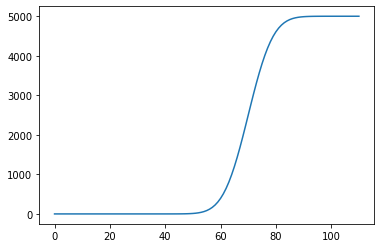

In [28]:
plt.plot(model(t_vec, guesses))

In [24]:
res = least_squares(residual, x0=guesses, args=(28, ))

In [25]:
res.x

array([2.16853333e+03, 7.79898818e-02, 8.17457080e+01])

NameError: name 't_max' is not defined

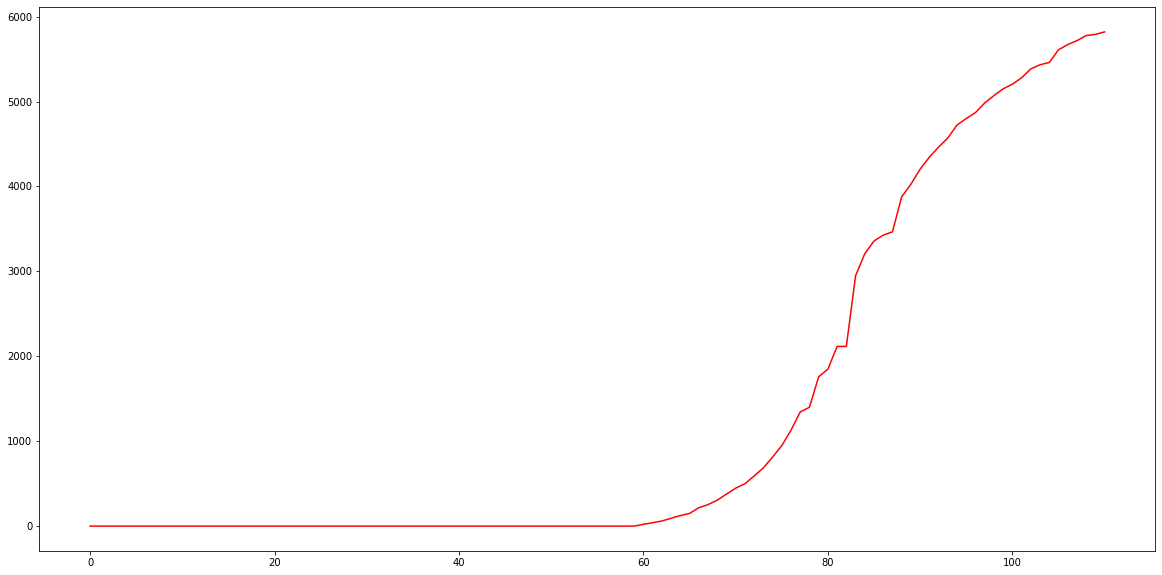

In [26]:
plt.figure(figsize=(20,10))
plt.plot(data, c='r')
for w in range(3, 28, 1):
    res = least_squares(residual, x0=guesses, args=(w, ))
    plt.plot(model(t_max, res.x), c='k', alpha=1/w+.1)
plt.show()

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


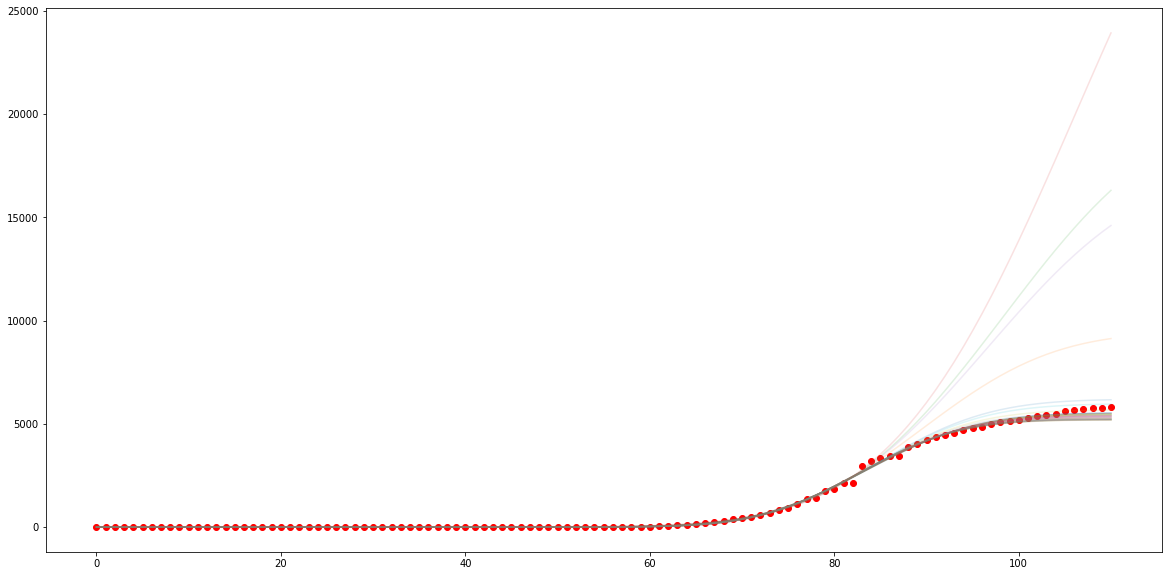

In [35]:
plt.figure(figsize=(20,10))
plt.plot(data, 'ro')
for w in range(3, 28, 1):
    print(w)
    res = least_squares(residual, x0=guesses, args=(w, ))
    plt.plot(model(t_vec, res.x), alpha=1/w+.1)
plt.show()

# Gaussian Process

In [36]:
import pymc3 as pm
import arviz as az

In [37]:
means=[8.25561133e+02, 1.00337817e-01, 7.43814888e+01]

In [ ]:
# how was mean estimated?

In [ ]:
# does the erf function needs to start low?

In [38]:
data[:-28]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,   21,   40,   60,   92,  124,  149,
        216,  253,  305,  376,  447,  499,  590,  685,  813,  948, 1129,
       1344, 1400, 1759, 1848, 2116, 2116])

In [44]:
#t_vec

In [39]:
with pm.Model() as erf_model:
    
    β = pm.Normal('β', mu=means[0], sigma=means[0]/10)
    γ = pm.Normal('γ', mu=means[1], sigma=means[1]/10)
    t_int = pm.Normal('t0', mu=means[2], sigma=means[2]/10)
    σ = pm.HalfNormal('σ', sigma=10)
    μ = β * (1 + pm.math.erf(γ * (t_vec[:-28] - t_int))) # beta: 1/2 of almost stable rate
    
    positive = pm.Normal('positive', mu=μ, sigma=σ, observed=data[:-28])


In [40]:
with erf_model:
    trace = pm.sample(1000, tune=2000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [σ, t0, γ, β]
Sampling 8 chains, 0 divergences: 100%|██████████| 24000/24000 [00:31<00:00, 771.33draws/s]
The acceptance probability does not match the target. It is 0.6530831087311006, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [ ]:
# each trace a function? 

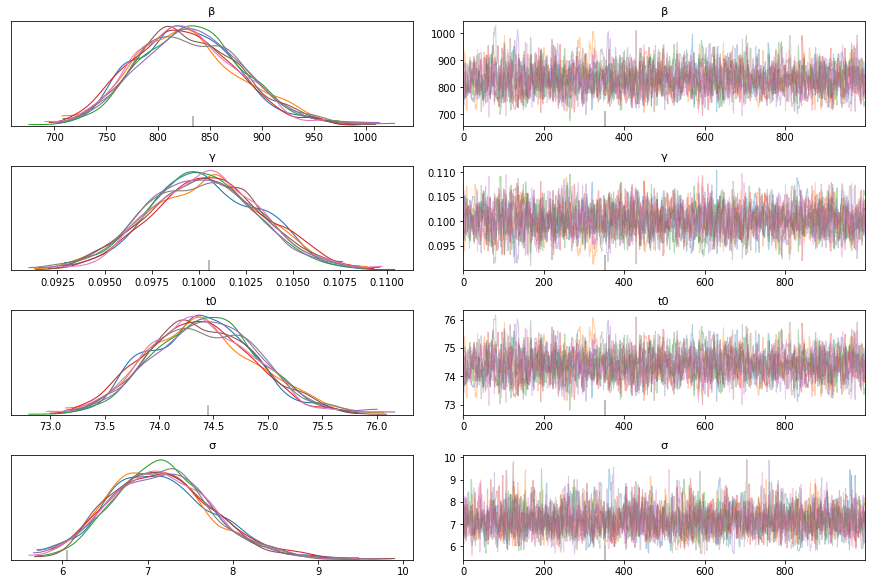

In [473]:
az.plot_trace(trace);

In [377]:
trace

<MultiTrace: 8 chains, 1000 iterations, 5 variables>

<Figure size 1440x720 with 0 Axes>

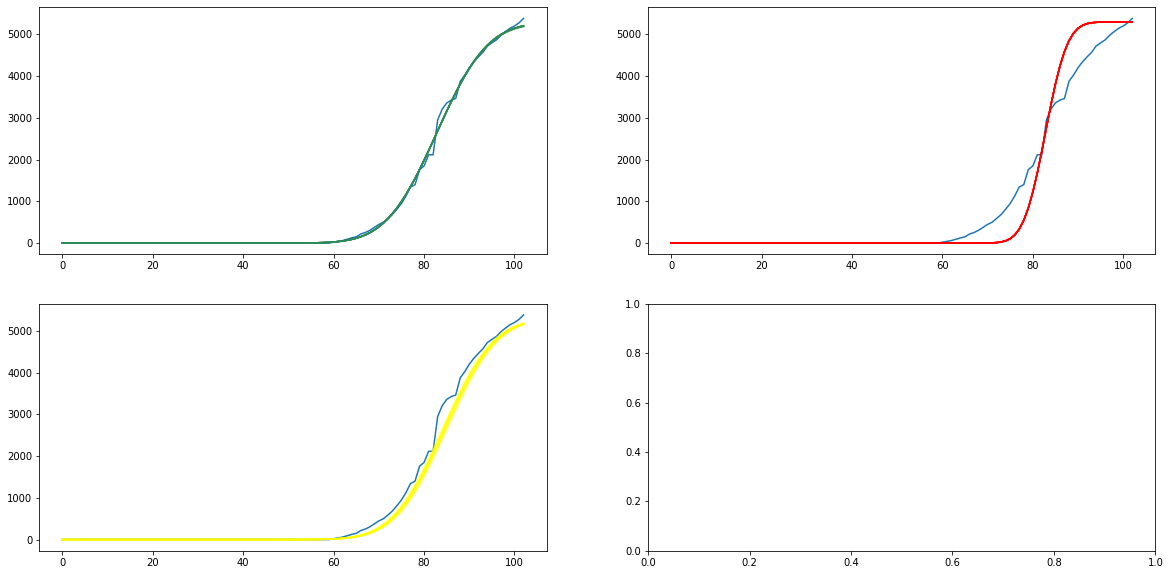

In [390]:
plt.figure(figsize=(20,10))
fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(20)
axs[0, 0].plot(t_vec, data)
for beta in trace['β'][:20]:
    axs[0, 0].plot(t_vec, beta * (1 + erf(means[1] * (np.array(t_vec) - means[2]))), alpha=0.3, color='seagreen')
axs[0, 1].plot(t_vec, data)
for gamma in trace['γ'][:20]:
    axs[0, 1].plot(t_vec, means[0] * (1 + erf(gamma * (np.array(t_vec) - means[2]))), alpha=0.3, color='red')
axs[1, 0].plot(t_vec, data)
for t_int in trace['t0'][:20]:
    axs[1, 0].plot(t_vec, means[0] * (1 + erf(means[1] * (np.array(t_vec) - t_int))), alpha=0.3, color='yellow')
plt.show()

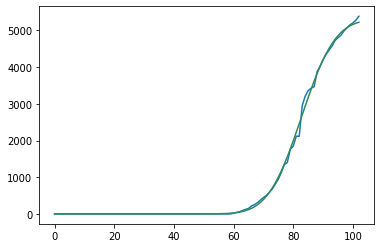

In [394]:
plt.plot(t_vec, data)
plt.plot(t_vec, means[0] * (1 + erf(means[1] * (np.array(t_vec) - means[2]))), color='seagreen')

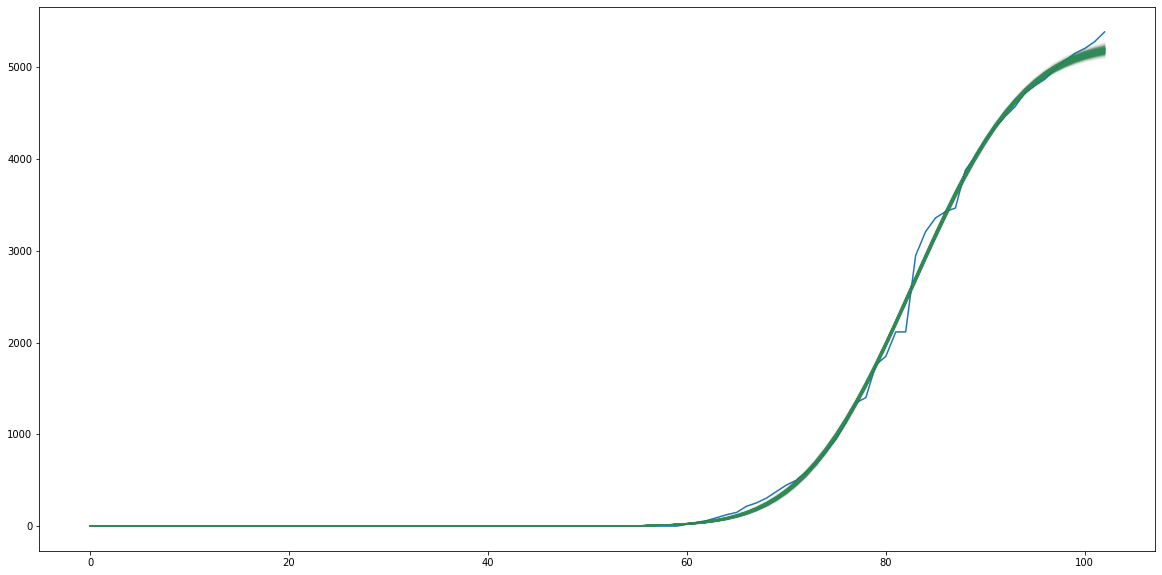

In [467]:
plt.figure(figsize=(20,10))
plt.plot(t_vec, data)
# ax.set_ylim(0, None)
for t in trace:
    plt.plot(t_vec, t['β'] * (1 + erf(t['γ'] * (np.array(t_vec) - t['t0']))), alpha=0.008, color='seagreen')
plt.savefig("1day.png")

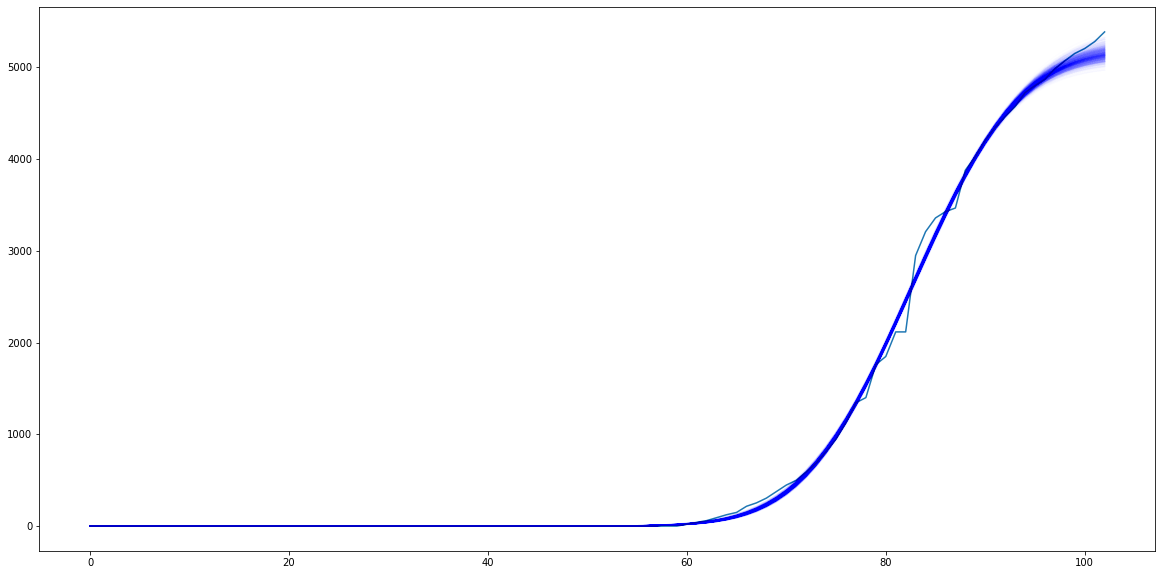

In [456]:
plt.figure(figsize=(20,10))
plt.plot(t_vec, data)
# ax.set_ylim(0, None)
for t in trace:
    plt.plot(t_vec, t['β'] * (1 + erf(t['γ'] * (np.array(t_vec) - t['t0']))), alpha=0.008, color='blue')
plt.savefig("1week.png")

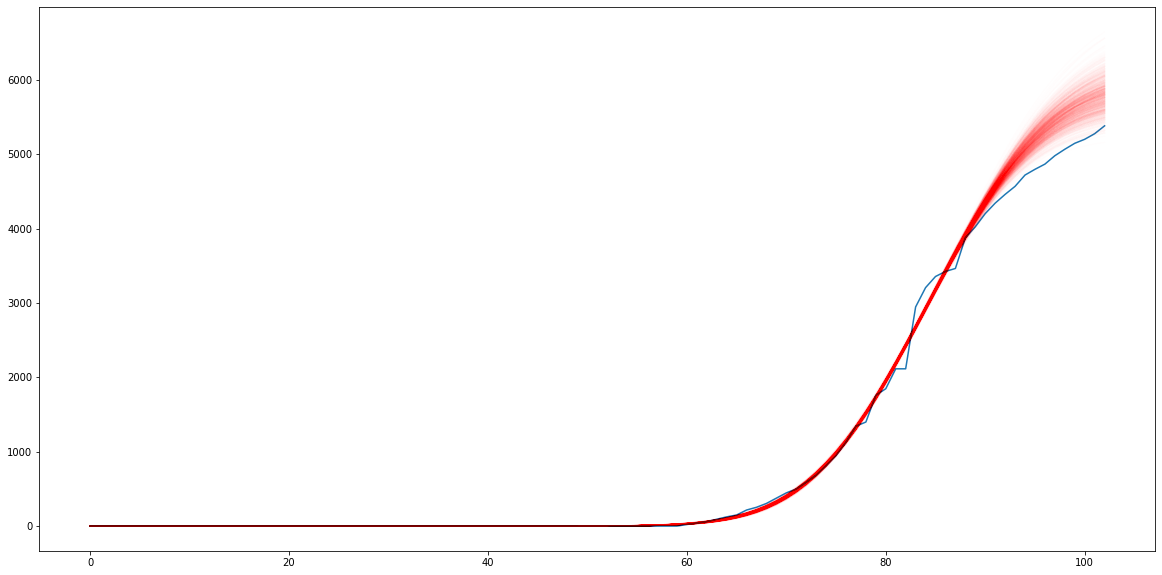

In [447]:
plt.figure(figsize=(20,10))
plt.plot(t_vec, data)
# ax.set_ylim(0, None)
for t in trace:
    plt.plot(t_vec, t['β'] * (1 + erf(t['γ'] * (np.array(t_vec) - t['t0']))), alpha=0.008, color='red')
plt.savefig("2weeks.png")

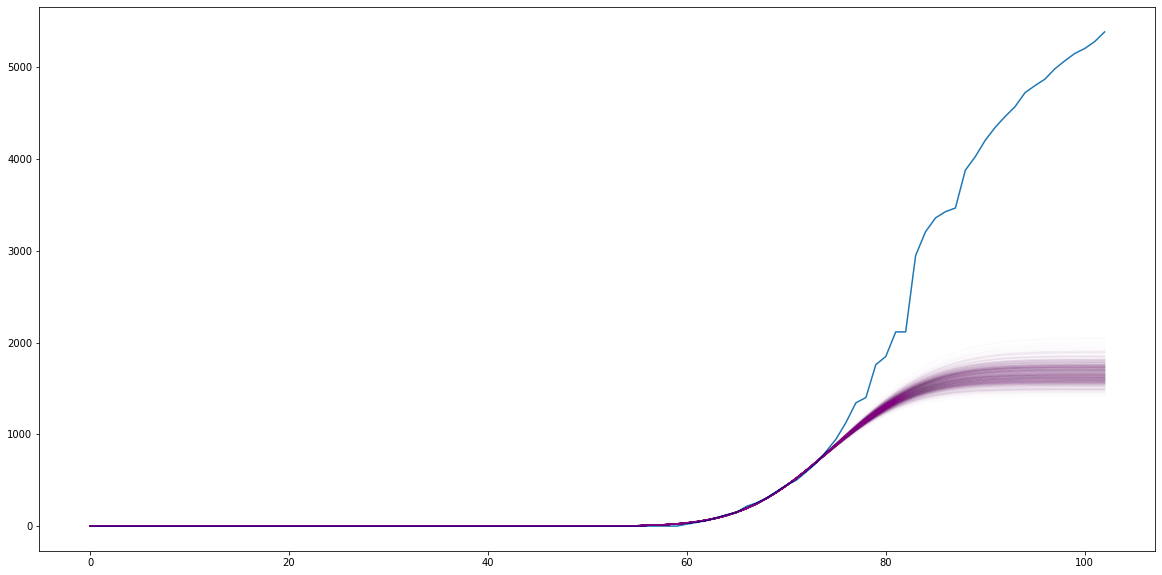

In [475]:
plt.figure(figsize=(20,10))
plt.plot(t_vec, data)
# ax.set_ylim(0, None)
for t in trace:
    plt.plot(t_vec, t['β'] * (1 + erf(t['γ'] * (np.array(t_vec) - t['t0']))), alpha=0.008, color='purple')
plt.savefig("1month.png")